# Kmeans Clustering From Scratch

In [1]:
import numpy as np
from numpy import apply_along_axis as apply
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# hyperparameters
k = 5
it = 20

def distance(a,b):
    """
    Distance metric to calculate between points and cluster centers.
    """
    return np.abs(a - b)

def total_var(x,label,k=k):
    """
    Total intracluster variance.
    """
    return np.sum([np.var(x[label == i]) for i in range(k)])

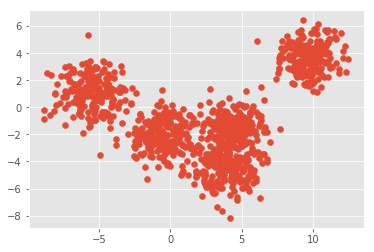

In [3]:
# generate a dataset
X, Y = make_blobs(n_samples=1000, centers=5,cluster_std=1.2,random_state=123,n_features=2)
plt.scatter(X[:, 0], X[:, 1])

# split for training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

# initialize cluster centers within these limits
limits = np.quantile(X_train,[0.05,0.95],axis=0)

# initial coordinates
centers = [apply(lambda x: np.random.uniform(x[0],x[1]),0,limits) for _ in range(k)]
centers = np.asarray(centers)

In [4]:
ic_var = []

# train
for _ in range(it):
    # get distances to centroids
    dist = apply(lambda c: np.sum(distance(X_train,c),axis=1),1,centers).T
    
    # get labels according to nearest cluster center
    label = np.argmin(dist,axis=1)
    
    # check accuracy
    ic_var.append(total_var(X_train,label,k))
    print(ic_var[-1])
    
    # update centers
    for i in range(k):
        centers[i] = np.mean(X_train[label == i],axis=0)

66.09254765732996
56.524580578902444
51.987987767208516
52.36284526660126
52.246968957159126
52.547237163828484
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802
52.66096792528802


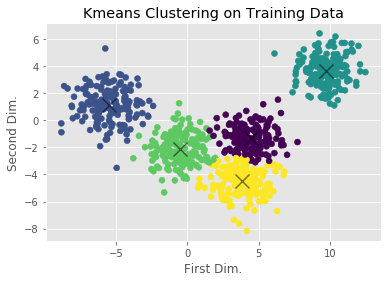

In [5]:
# results on training data
plt.scatter(X_train[:,0],X_train[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1], c='black', s=200, alpha=0.5, marker = 'x')
plt.title('Kmeans Clustering on Training Data')
plt.xlabel('First Dim.')
plt.ylabel('Second Dim.')
plt.show()

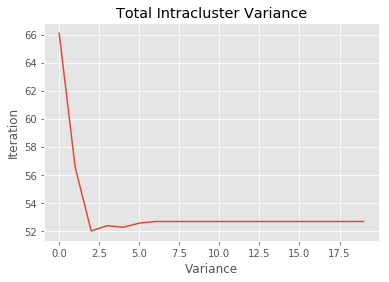

In [6]:
ic_var = np.asarray(ic_var)
plt.plot(np.arange(it),ic_var)
plt.title('Total Intracluster Variance')
plt.xlabel('Variance')
plt.ylabel('Iteration')
plt.show()

In [7]:
# test
dist = apply(lambda c: np.sum(distance(X_test,c),axis=1),1,centers).T
label = np.argmin(dist,axis=1)

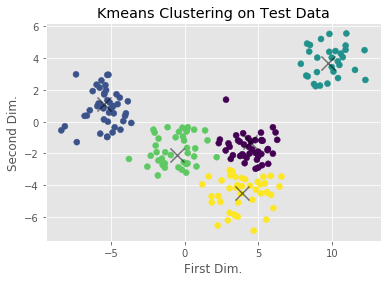

In [8]:
# results on test data
plt.scatter(X_test[:,0],X_test[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1], c='black', s=200, alpha=0.5, marker = 'x')
plt.title('Kmeans Clustering on Test Data')
plt.xlabel('First Dim.')
plt.ylabel('Second Dim.')
plt.show()